<a href="https://colab.research.google.com/github/luciekash/Optimizing-Neural-Networks---Project/blob/main/Optimizing_Neural_Networks_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, you have been tasked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). You will be required to perform feature engineering then tune your most accurate model.

### b) Defining the Metric for Success

We will use the accuracy score as a metric for our success with 80% as success.

### c) Understanding the Context 

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data is appropriate for the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing the train dataset
train = pd.read_csv('https://bit.ly/31azYjb')
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C


In [3]:
# loading and previewing the test dataset
test = pd.read_csv('https://bit.ly/2XmmAYe ')
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.750,NaN,Q
312,1204,3,"Sadowitz, Mr. Harry",male,NaN,0,0,LP 1588,7.575,NaN,S


In [4]:
# checking the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [5]:
# checking data types of Train
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# checking data types of Test
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# dropping duplicates, if any
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [8]:
# checking for missing data in Train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# replacing missing 'Age' values with column mean and 'Embarked' with mode
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
train.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# checking for missing data in Test
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# repacing missing 'Age' and 'Fare' values with their respective mean
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
test.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

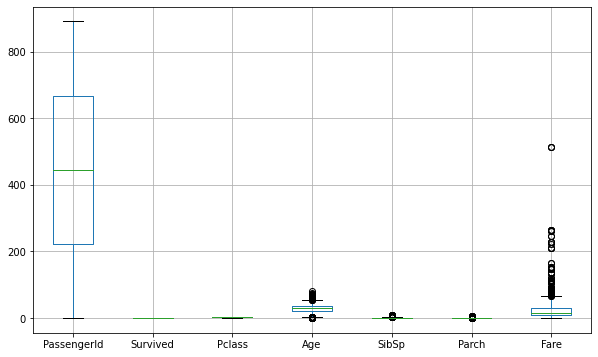

In [12]:
# visualizing the distribution of outliers - Train
plt.figure(figsize = (10, 6))
train.boxplot()
plt.show()

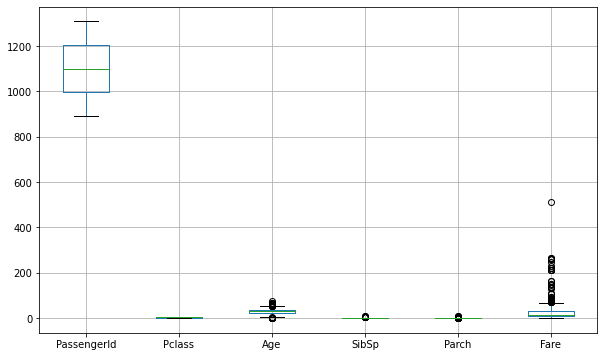

In [13]:
# visualizing the distribution of outliers - Test
plt.figure(figsize = (10, 6))
test.boxplot()
plt.show()

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Feature Engineering

### 3.1.1 Getting the Title

In [14]:
# Train
# extracting the title from the name
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
train.drop(columns = ['Name'], inplace = True)

# previewing the changes
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
133,134,1,2,female,29.0,1,0,228414,26.0,S,Mrs
752,753,0,3,male,33.0,0,0,345780,9.5,S,Mr
683,684,0,3,male,14.0,5,2,CA 2144,46.9,S,Mr


### 3.1.2 Getting the Family Size

In [15]:
# Train
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

train['FamilySize'] = train.SibSp+train.Parch+1

train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [45]:
# Test
# extracting the title from the name
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
test.drop(columns = ['Name'], inplace = True)

# previewing the changes
test.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FarePerPerson,Title
386,3,1,24.00000,0,0,7.775,2,3.0,2.591667,Mr
76,3,1,30.27259,0,0,8.050,2,1.0,8.050000,Mr
308,1,1,55.00000,1,1,93.500,2,2.0,46.750000,Mr


In [46]:
# Test
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

test['FamilySize'] = test.SibSp+train.Parch+1

test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FarePerPerson,Title
0,3,1,34.5,0,0,7.8292,1,1.0,7.82920,Mr
1,3,0,47.0,1,0,7.0000,2,2.0,3.50000,Mrs
2,2,1,62.0,0,0,9.6875,1,1.0,9.68750,Mr
3,3,1,27.0,0,0,8.6625,2,1.0,8.66250,Mr
4,3,0,22.0,1,1,12.2875,2,2.0,6.14375,Mrs


### 3.1.3 Getting the Fare per Person

In [17]:
# Train
# create new variable 'FarePerPerson' which is Fare / FamilySize

train['FarePerPerson'] = train.Fare / train.FamilySize
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
21,22,1,2,male,34.0,0,0,248698,13.00,S,Mr,1,13.00
157,158,0,3,male,30.0,0,0,SOTON/OQ 392090,8.05,S,Mr,1,8.05
482,483,0,3,male,50.0,0,0,A/5 3594,8.05,S,Mr,1,8.05


In [47]:
# Test
# create new variable 'FarePerPerson' which is Fare / FamilySize

test['FarePerPerson'] = test.Fare / test.FamilySize
test.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FarePerPerson,Title
186,2,0,21.0,0,1,21.00,2,1.0,21.00,Miss
415,3,1,38.5,0,0,7.25,2,1.0,7.25,Mr
141,1,0,33.0,0,0,151.55,2,1.0,151.55,Miss


In [19]:
# dropping unneeded columns 'PassengerId' and 'Ticket'
train.drop(columns = ['PassengerId', 'Ticket'], inplace = True)
test.drop(columns = ['PassengerId', 'Ticket'], inplace = True)

# dropping duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# preview the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (787, 11)
Test shape: (418, 10)


In [48]:
# saving to clean CSV files
train.to_csv('train_clean.csv', index = False)
test.to_csv('test_clean.csv', index = False)

## 3.2 Univariate Analysis 

### 3.2.1 Train dataset

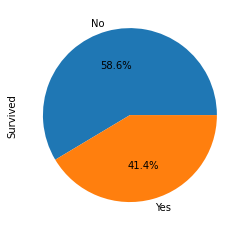

In [21]:
# distribution of those who survived vs those who didn't
plt.figure(figsize = (4, 4))
train.Survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = ["No", "Yes"])
plt.show()

A little over half of the passengers did not survive the sinking of the ship.

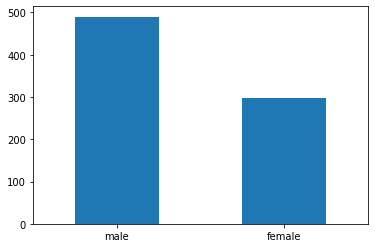

In [22]:
# distribution of gender
plt.figure(figsize = (6, 4))
train.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

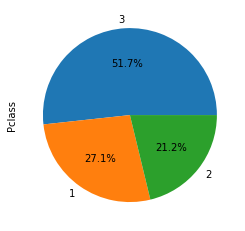

In [23]:
# distribution of class
plt.figure(figsize = (4, 4))
train.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

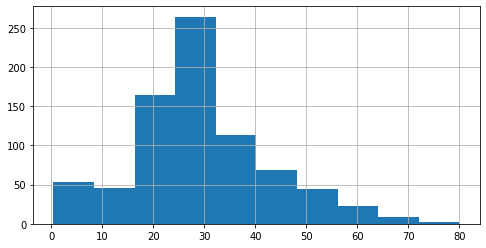

In [24]:
# distribution of age
plt.figure(figsize = (8, 4))
train.Age.hist()
plt.show()

Majority of the passengers are between 24-31 years. Minority are 55 and above.

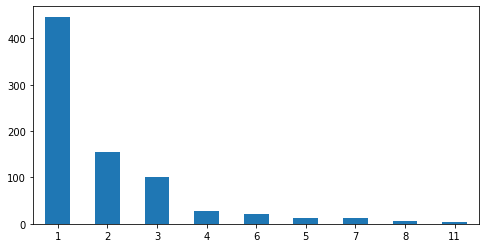

In [25]:
# distribution of family size
plt.figure(figsize = (8, 4))
train.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

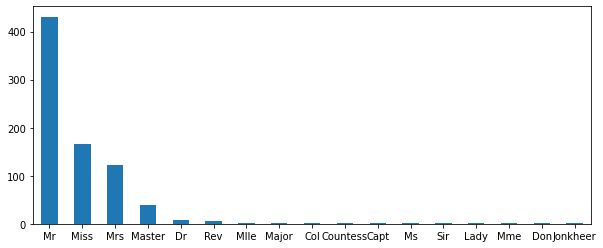

In [26]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

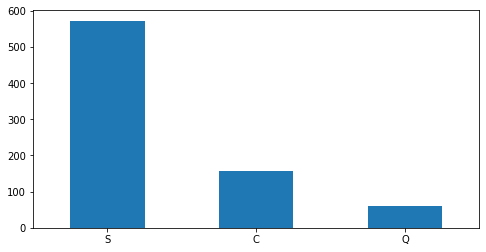

In [27]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
train.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

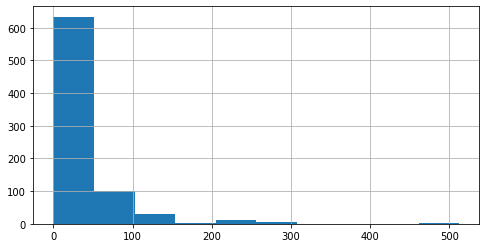

In [28]:
# distribution of fare
plt.figure(figsize = (8, 4))
train.Fare.hist()
plt.show()

Most of the fare prices are between 0-100.

### 3.2.2 Test dataset

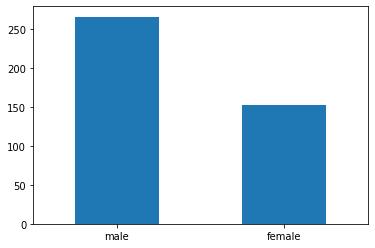

In [29]:
# distribution of gender
plt.figure(figsize = (6, 4))
test.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

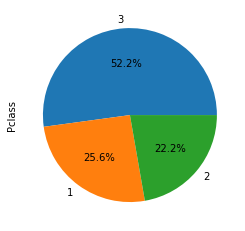

In [30]:
# distribution of class
plt.figure(figsize = (4, 4))
test.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

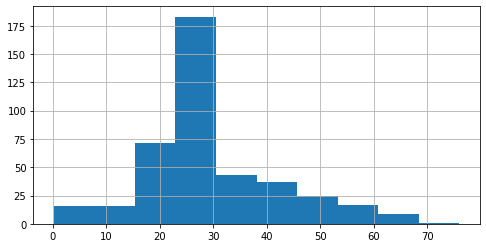

In [31]:
# distribution of age
plt.figure(figsize = (8, 4))
test.Age.hist()
plt.show()

Majority of the passengers are between 24-30 years. Minority are 69 and above.

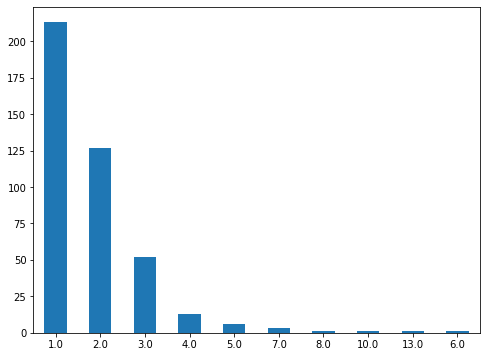

In [32]:
# distribution of family size
plt.figure(figsize = (8, 6))
test.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

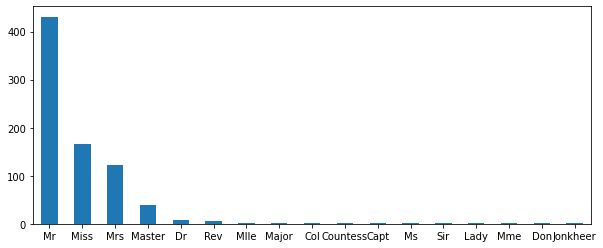

In [33]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

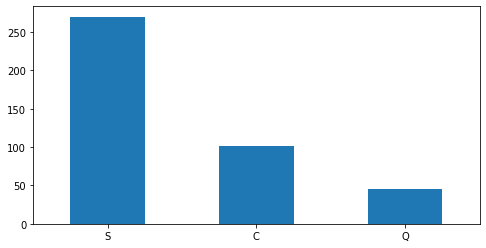

In [34]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
test.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

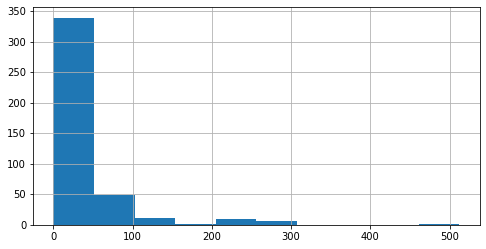

In [35]:
# distribution of fare
plt.figure(figsize = (8, 4))
test.Fare.hist()
plt.show()

Most of the prices are between 0-100.

## 3.3 Bivariate Analysis

We will look at how the other variables relate to the target variable ('Survived') in the Train dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


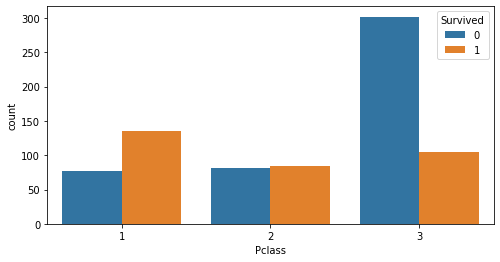

In [36]:
# distribution of Survived by class
plt.figure(figsize = (8, 4))
sns.countplot(train['Pclass'], hue = train['Survived'])
plt.show()

Majority of those who survived were in 1st class. Majority of those who died were in 3rd class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


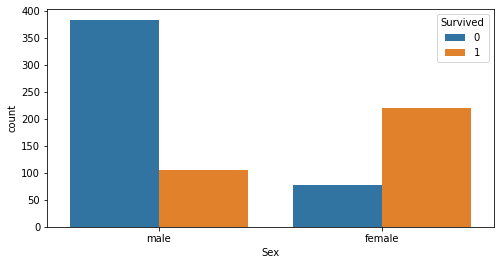

In [37]:
# distribution of Survived by gender
plt.figure(figsize = (8, 4))
sns.countplot(train['Sex'], hue = train['Survived'])
plt.show()

Majority of those who survived were female while majority of those who died were male.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


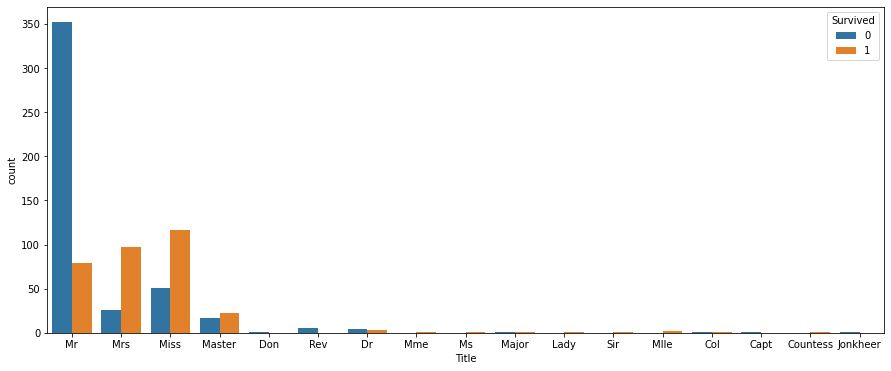

In [38]:
# distribution of Survived by title
plt.figure(figsize = (15, 6))
sns.countplot(train['Title'], hue = train['Survived'])
plt.show()

Majority of those who survived were the women, including those with superior titles like Mme, Mlle, and Countess. Majority of those who died were men, including those with superior titles like Col, Capt, and Jonkheer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


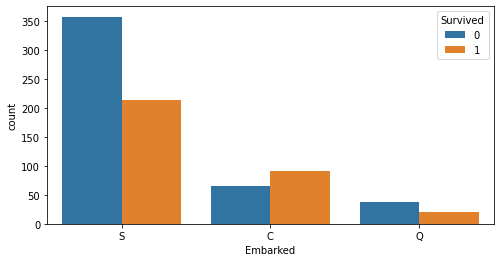

In [39]:
# distribution of Survived by point of embarkment
plt.figure(figsize = (8, 4))
sns.countplot(train['Embarked'], hue = train['Survived'])
plt.show()

Those who embarked at point S survived and died more than their counterparts who embarked at points C and Q.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


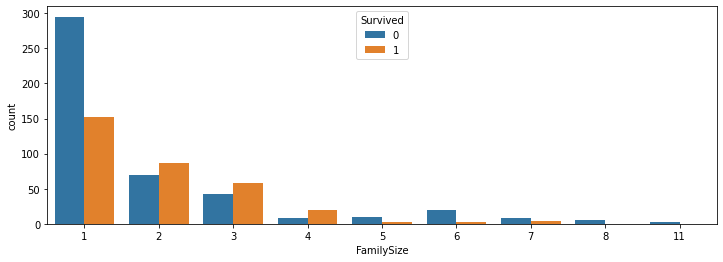

In [40]:
# distribution of Survived by family size
plt.figure(figsize = (12, 4))
sns.countplot(train['FamilySize'], hue = train['Survived'])
plt.show()

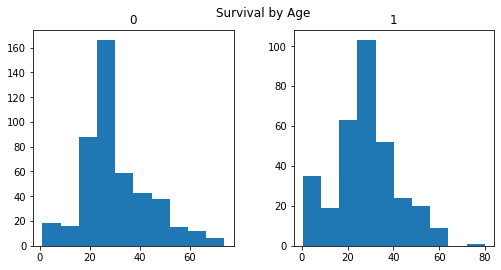

In [41]:
# survived by age
train.hist('Age', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Age")
plt.show()

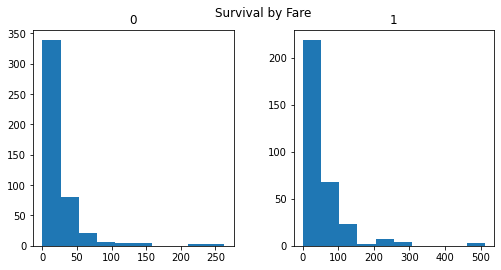

In [42]:
# survived by Fare
train.hist('Fare', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Fare")
plt.show()

## 3.4 Feature Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

#Encoding Sex
le_sex = LabelEncoder().fit(train['Sex'].unique())
sex_classes = le_sex.classes_
train['Sex'] = le_sex.transform(train['Sex'].values)
test['Sex'] = le_sex.transform(test['Sex'].values)

#Encoding Embarked
le_embarked = LabelEncoder().fit(train['Embarked'].unique())
embarked_classes = le_embarked.classes_
train['Embarked'] = le_embarked.transform(train['Embarked'].values)
test['Embarked'] = le_embarked.transform(test['Embarked'].values)


#Encoding Title
le_train_title = LabelEncoder().fit(train['Title'].unique())
train_title_classes = le_train_title.classes_
train['Title'] = le_train_title.transform(train['Title'].values)

#Encode Title: Test
le_test_title = LabelEncoder().fit(test['Title'].unique())
test_title_classes = le_test_title.classes_
test['Title'] = le_test_title.transform(test['Title'].values)



#Previewing our modified datatypes
print("Train:")
print(train.dtypes)
print()
print("Test:")
print(test.dtypes)

Train:
Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object

Test:
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
FamilySize       float64
FarePerPerson    float64
Title              int64
dtype: object


# <font color='#2F4F4F'>4. Data Modeling</font>

In [50]:
# splitting Train data into features (X) and label (Y)

from sklearn.model_selection import train_test_split

train_properties = list(train.columns.values)
train_properties.remove('Survived')
X = train[train_properties]
Y = train['Survived']

In [51]:
# splitting into 75-25 training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [52]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform X_train, transform X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("X_val shape:", train.shape)
print("y_val shape:", test.shape)

Train shape: (787, 11)
Test shape: (418, 10)
X_val shape: (787, 11)
y_val shape: (418, 10)


## 4.1 Normal Modeling

In [58]:
# Neural networks library and modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Defining our ANN and compiling it 
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))


# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, Y_train, epochs = 20, batch_size = 10)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, Y_test)
print('Sample 1: ANN Accuracy:', accuracy)

Epoch 1/20
51/51 [==============================] - 1s 2ms/step - loss: 0.7203 - accuracy: 0.5288
Epoch 2/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5606
Epoch 3/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6024
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6262
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6839
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.6740
Epoch 7/20
51/51 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6481
Epoch 8/20
51/51 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6918
Epoch 9/20
51/51 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6740
Epoch 10/20
51/51 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6998
Epoch 11/20
51/51 [

## 4.2 Modeling with Grid Search

For this example, we will use the Runtime type -> TPU (Tensorfolow Processing Unit). To change run type go to Menu -> Runtime -> Change runtime type -> TPU.

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [56]:

# Tuning the no. of epochs 
# ---
# epochs = [50, 100, 500]
# ---

# Creating our ANN 

def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 10, input_dim = 10, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  
# Compile the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Return the model
  return classifier

# Creating the KerasClassifier instance
model_epochs_batches = KerasClassifier(build_fn = create_model)

# Performing grid search

epochs = [50, 100, 500]
#epochs = [50, 150, 200, 250, 300]
batch_size = [32, 40, 48, 56, 60]
param_grid = dict(batch_size = batch_size, epochs = epochs) 
grid = GridSearchCV(estimator = model_epochs_batches, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_result = grid.fit(X_train, Y_train)


# Summarizing our grid search results

epochs = [50, 100, 500]
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 1s 4ms/step - loss: 0.6669 - accuracy: 0.6318
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6493
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6020
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6368
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6095
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6567
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6244
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6144
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6396 - accuracy: 0.6294
Epoch 10/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6461 - accurac

In [59]:
# Tuning the no. of Epochs
# ---
# epochs = 500 and batch size = 10
# ---
#  
# Defining our ANN and compiling it 
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))


# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, Y_train, epochs = 500, batch_size = 10)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, Y_test)
print('Sample 1: ANN Accuracy:', accuracy)

Epoch 1/500
101/101 [==============================] - 1s 2ms/step - loss: 0.7282 - accuracy: 0.5746
Epoch 2/500
101/101 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6819
Epoch 3/500
101/101 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6839
Epoch 4/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.6938
Epoch 5/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7197
Epoch 6/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7197
Epoch 7/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7296
Epoch 8/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7296
Epoch 9/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7495
Epoch 10/500
101/101 [==============================] - 0s 2ms/step - loss: 0.5347 - accura

The first ANN had an accuracy score of 77.84%. After Optimizing the model the acurracy increased to 81.64%

# <font color='#2F4F4F'>5. Summary of Findings</font>

The model has better accuracy with large number of epochs but less batches

# <font color='#2F4F4F'>6. Challenging your Solution</font>

### a) Did we have the right question?

Yes.

### b) Did we have the right data?
Yes

### c) What can be done to improve the solution?
Introduce more training data
